# Изменение порога в модели логистической регрессии


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Задача: датасет о кредитном скоринге 

В этом примере у нас уже есть обученная модель для предсказания вероятности того, что клиент вернёт кредит.

* Колонки 0, 1, ..., 13 — анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* target — целевая переменная: 1 — выдать кредит, 0 — не выдать кредит.

* pred_probs — предсказанные вероятности положительного класса, полученные алгоритмом.
* pred_classes — предсказанные алгоритмом классы.

Задача — оценить качество модели и разобраться, как изменение порога для перевода вероятности в классы влияет на метрики precision и recall.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/Skillbox/master/credit_scoring.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target,pred_probs,pred_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0,0.610853,1
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0,0.185941,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0,0.523009,1
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1,0.185941,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1,0.526646,1


In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target,pred_probs,pred_classes
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0,0.610853,1
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0,0.185941,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0,0.523009,1
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1,0.185941,0
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1,0.526646,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1,0.804659,1
685,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0,0.175782,0
686,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1,0.185941,0
687,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1,0.804659,1


Посмотрим на значения метрик precision и recall.

In [7]:
from sklearn.metrics import precision_score, recall_score

print('точность:', precision_score(df['target'], df['pred_classes']))
print('полнота:', recall_score(df['target'], df['pred_classes']))

точность: 0.6103542234332425
полнота: 0.7296416938110749


Очень полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог для перевода вероятности в классы, мы можем достичь оптимального решения нашей задачи.

In [17]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

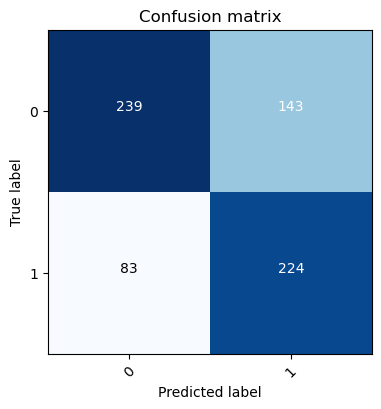

In [18]:
plot_confusion_matrix(confusion_matrix(df['target'], df['pred_classes']), classes=['0','1'],
                      title='Confusion matrix')

Теперь будем менять порог для перевода вероятности в классы и смотреть, как это повлияет на матрицу ошибок и на метрики.


порог: 0.1
точность: 0.46200607902735563
полнота: 0.990228013029316


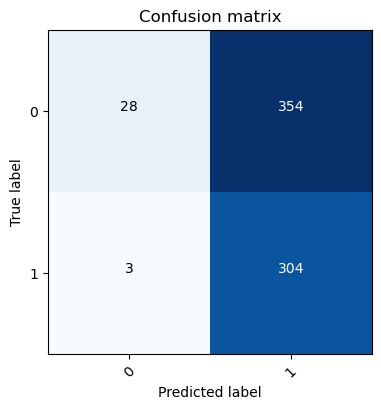


порог: 0.30000000000000004
точность: 0.5962877030162413
полнота: 0.8371335504885994


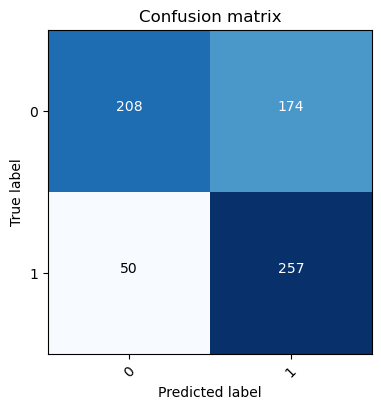


порог: 0.5000000000000001
точность: 0.6103542234332425
полнота: 0.7296416938110749


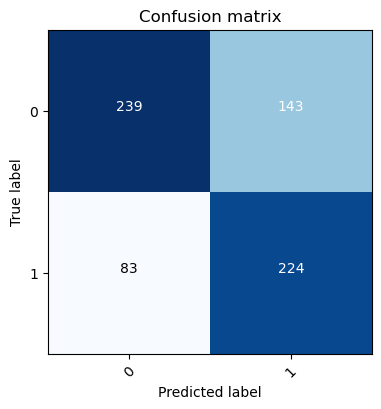


порог: 0.7000000000000001
точность: 0.8125
полнота: 0.2964169381107492


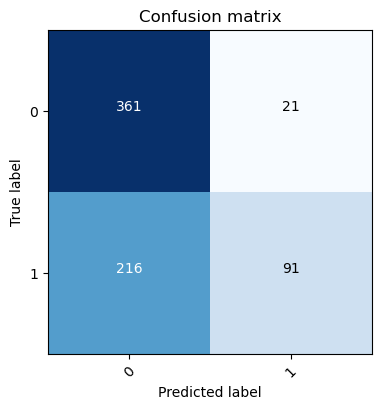


порог: 0.9000000000000001
точность: 1.0
полнота: 0.03908794788273615


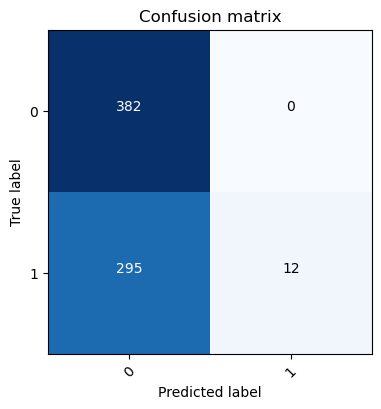

In [19]:
for threshold in np.arange(0.1, 1, 0.2):
    classes = (df['pred_probs'] > threshold).astype(int)

    print('\nпорог:', threshold)
    plot_confusion_matrix(confusion_matrix(df['target'], classes), classes=['0','1'],
                          title='Confusion matrix')
    print('точность:', precision_score(df['target'], classes))
    print('полнота:', recall_score(df['target'], classes))
    show()

Мы видим, что при увеличении порога растёт точность и падает полнота, и наоборот. Таким образом, подбирая порог, мы можем влиять на значения метрик.

Отметим, что подбором порога мы в некотором смысле подгоняем нашу модель под нужное значение метрики, поэтому здесь нужно аккуратно валидировать модель, чтобы не переобучиться.